<a href="https://colab.research.google.com/github/Hamid-Mofidi/PINNs_on_Multiple_timescale_dynamics/blob/main/Examples/Example2_3x3exact_sol_odeint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving a 3x3 system numerically (Comparing ODEint with the exact solution to obtain the error).

$$
\begin{aligned}
ɛ \frac{dx}{dt} =& - x,\\
ɛ \frac{dy}{dt} =&  2 y + ɛ x,\\
\frac{dz}{dt} =& x^2 + 1,
\end{aligned}
$$
where $ɛ$ is a small number. The above system is the slow system, but in the following code, I used the fast system.


In another code, I have the errors obtained by PINNs. I want to have a separate code with errors to compare the errors obtained by odeint with the errors obtained by PINNs in above to see which one works better.




In [112]:
import numpy as np
from scipy.integrate import solve_ivp

def NewSystem(t, y, eps):
    x, y, z = y
    dxdt = -x
    dydt = 2 * y + eps * x
    dzdt = eps * (x**2 + 1)
    return [dxdt, dydt, dzdt]

# Define the exact solution
def ExactSolution(t, eps, x0, y0, z0):
    x_real = x0 * np.exp(-t)
    y_real =   (np.exp(2 * t)) * (y0 + (eps*x0/3) * (1- np.exp(-3 * t) ) )
    z_real = (eps *x0**2/2) * (1 - np.exp(-2 * t)) + eps * t + z0
    return x_real, y_real, z_real


# Initial conditions
x0 = 1
y0 = 0
z0 = 0
t = np.linspace(0, 5, 1000)
eps = 0.01

# Ending point
ending_point = np.array([0.006737946999085467, 73.4215301895324, 0.05499977300035119])

# Callback function to terminate integration when the solution reaches the ending point
def terminate_on_endpoint(t, y, eps):
    return np.linalg.norm(np.array([y[0], y[1], y[2]]) - ending_point)


y0_exact = [x0, y0, z0]

# Define the event function with explicit parameters
def event_function(t, y, eps):
    return terminate_on_endpoint(t, y, eps)

# Integrate the ODE system until the solution reaches the ending point
# Integrate the ODE system until the solution reaches the ending point
solution = solve_ivp(NewSystem, [0, 10], y0_exact, args=(eps,), events=(event_function,), dense_output=True)

# Extract the solution
t = solution.t
x_exact, y_exact, z_exact = solution.y
t_events = solution.t_events[0] if solution.t_events else None

if t_events is not None and len(t_events) > 0:
    t_end_index = np.argmin(np.abs(t - t_events[0]))  # Index of t closest to t_end
    x_end = x_exact[t_end_index]
    y_end = y_exact[t_end_index]
    z_end = z_exact[t_end_index]

    # Print the end time and the corresponding values
    print("End time:", t_events[0])
    print("End point (x, y, z):", (x_end, y_end, z_end))
else:
    print("The event condition was not satisfied within the integration interval.")


The event condition was not satisfied within the integration interval.


In [104]:
import numpy as np
from scipy.integrate import odeint

# Define the ODE system
def NewSystem(y, t, eps):
    x, y, z = y
    dxdt = -x
    dydt = 2 * y + eps * x
    dzdt = eps * (x**2 + 1)
    return [dxdt, dydt, dzdt]

# Define the exact solution
def ExactSolution(t, eps, x0, y0, z0):
    x_real = x0 * np.exp(-t)
    y_real =   (np.exp(2 * t)) * (y0 + (eps*x0/3) * (1- np.exp(-3 * t) ) )
    z_real = (eps *x0**2/2) * (1 - np.exp(-2 * t)) + eps * t + z0
    return x_real, y_real, z_real


# Initial conditions
x0 = 1
y0 = 0
z0 = 0
t = np.linspace(0, 5, 100)
eps = 0.01

# Exact solution
x_exact, y_exact, z_exact = ExactSolution(t, eps, x0, y0, z0)

# Solve the ODE numerically using odeint
y0_numerical = [x0, y0, z0]
solution_numerical = odeint(NewSystem, y0_numerical, t, args=(eps,))
x_numerical, y_numerical, z_numerical = solution_numerical.T

# Calculate errors
error_x = np.abs(x_exact - x_numerical)
error_y = np.abs(y_exact - y_numerical)
error_z = np.abs(z_exact - z_numerical)

# Print errors
print("Maximum error in x:", np.max(error_x))
print("Maximum error in y:", np.max(error_y))
print("Maximum error in z:", np.max(error_z))
print("starting point:", x_exact[0],y_exact[0],z_exact[0])
print("ending point:", x_exact[-1],y_exact[-1],z_exact[-1])
#print(y_exact)




Maximum error in x: 3.1472241479590934e-08
Maximum error in y: 0.00027010747251665634
Maximum error in z: 6.207274699451815e-09
starting point: 1.0 0.0 0.0
ending point: 0.006737946999085467 73.4215301895324 0.05499977300035119


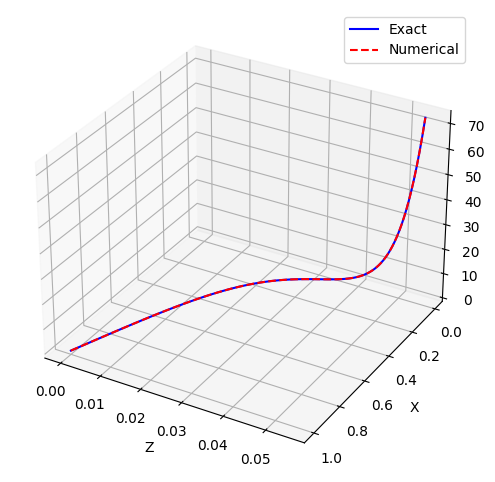

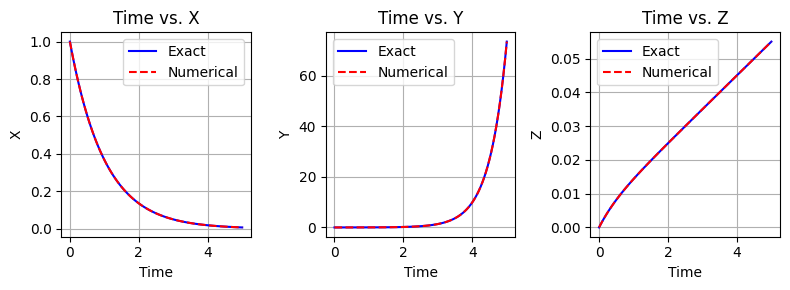

In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot exact solution
ax.plot(z_exact, x_exact, y_exact, 'b-', label='Exact')

# Plot numerical solution
ax.plot(z_numerical, x_numerical, y_numerical, 'r--', label='Numerical')

# Set labels
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

ax.invert_yaxis()

# Add legend
ax.legend()

plt.show()


import matplotlib.pyplot as plt

# Create subplots with a single row and three columns
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

# Plot time vs. x
axs[0].plot(t, x_exact, 'b-', label='Exact')
axs[0].plot(t, x_numerical, 'r--', label='Numerical')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('X')
axs[0].set_title('Time vs. X')
axs[0].legend()
axs[0].grid(True)

# Plot time vs. y
axs[1].plot(t, y_exact, 'b-', label='Exact')
axs[1].plot(t, y_numerical, 'r--', label='Numerical')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Y')
axs[1].set_title('Time vs. Y')
axs[1].legend()
axs[1].grid(True)

# Plot time vs. z
axs[2].plot(t, z_exact, 'b-', label='Exact')
axs[2].plot(t, z_numerical, 'r--', label='Numerical')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Z')
axs[2].set_title('Time vs. Z')
axs[2].legend()
axs[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
